# Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

# Loading the datasets

In [4]:
df = pd.read_csv(r'Data_sets/Student_data.csv')

# laoding the data set using 'os' module
folder_path = 'Data_sets'
csv_file = 'Student_data.csv'
csv_path = os.path.join(folder_path, csv_file)
print(csv_path)

Data_sets/Student_data.csv


# Data explorations and Initial inspection

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,KEC,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4,1,1,3,4,11
1,KEC,F,17,U,GT3,T,1,1,at_home,NaN,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3,1,1,3,2,11
2,KEC,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,NaN,NaN,2,2,3,3,6,12
3,KEC,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3.0,2.0,2,1,1,5,0,14
4,KEC,F,16,U,GT3,T,3,3,NaN,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,NaN,3.0,2,1,2,5,0,13


In [6]:
df.shape

(649, 31)

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    int64  
 7   Fedu        649 non-null    int64  
 8   Mjob        647 non-null    object 
 9   Fjob        646 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    int64  
 13  studytime   649 non-null    int64  
 14  failures    649 non-null    int64  
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,646.000000,648.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930341,3.180556,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.957925,1.051881,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


In [10]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          2
Fjob          3
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        3
freetime      1
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [11]:
df.isnull().sum() / df.shape[0] * 100

school        0.000000
sex           0.000000
age           0.000000
address       0.000000
famsize       0.000000
Pstatus       0.000000
Medu          0.000000
Fedu          0.000000
Mjob          0.308166
Fjob          0.462250
reason        0.000000
guardian      0.000000
traveltime    0.000000
studytime     0.000000
failures      0.000000
schoolsup     0.000000
famsup        0.000000
paid          0.000000
activities    0.000000
nursery       0.000000
higher        0.000000
internet      0.000000
romantic      0.000000
famrel        0.462250
freetime      0.154083
goout         0.000000
Dalc          0.000000
Walc          0.000000
health        0.000000
absences      0.000000
G3            0.000000
dtype: float64

# Handling missing values

In [12]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          2
Fjob          3
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        3
freetime      1
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

## listing categorical and numerical columns

In [13]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
numerical_columns = df.select_dtypes(exclude=['category', 'object']).columns

### Before & After filling missing values in a categorical columns with mode

In [14]:
df[categorical_columns].isnull().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Mjob          2
Fjob          3
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64

In [15]:
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [16]:
df[categorical_columns].isnull().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64

### Before & After filling missing values in a numerical columns with mean or median

In [17]:
df[numerical_columns].isnull().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        3
freetime      1
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

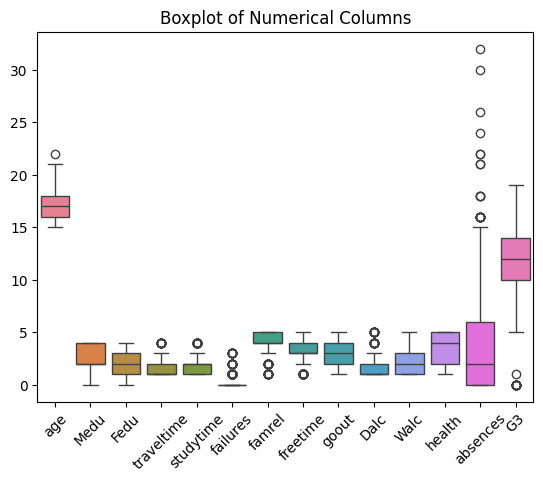

In [18]:
plt.Figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.show()

In [19]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [20]:
df[numerical_columns].isnull().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [21]:
df[numerical_columns].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,18,4,4,2,2,0,4.0,3.0,4,1,1,3,4,11
1,17,1,1,1,2,0,5.0,3.0,3,1,1,3,2,11
2,15,1,1,1,2,0,4.0,3.0,2,2,3,3,6,12
3,15,4,2,1,3,0,3.0,2.0,2,1,1,5,0,14
4,16,3,3,1,2,0,4.0,3.0,2,1,2,5,0,13


## To determine whether numerical columns follow a normal distribution, you can perform statistical tests or visual inspection. Normal distribution, also known as Gaussian distribution, is characterized by a bell-shaped curve where the data cluster around the mean, with most calues close to the mean and fewer values farther away.

**Visual Inspection:** Create visualizations like histograms or QQ plots (Quantile-Quantile plots) to visually assess thendistribution of your numerical data. A histogram can show the shape of the data distribution, while a QQ plot compares the quantiles of your data against those expected from a normal distribution. A linear pattern in a QQ plot suggests the data is normally distributed.

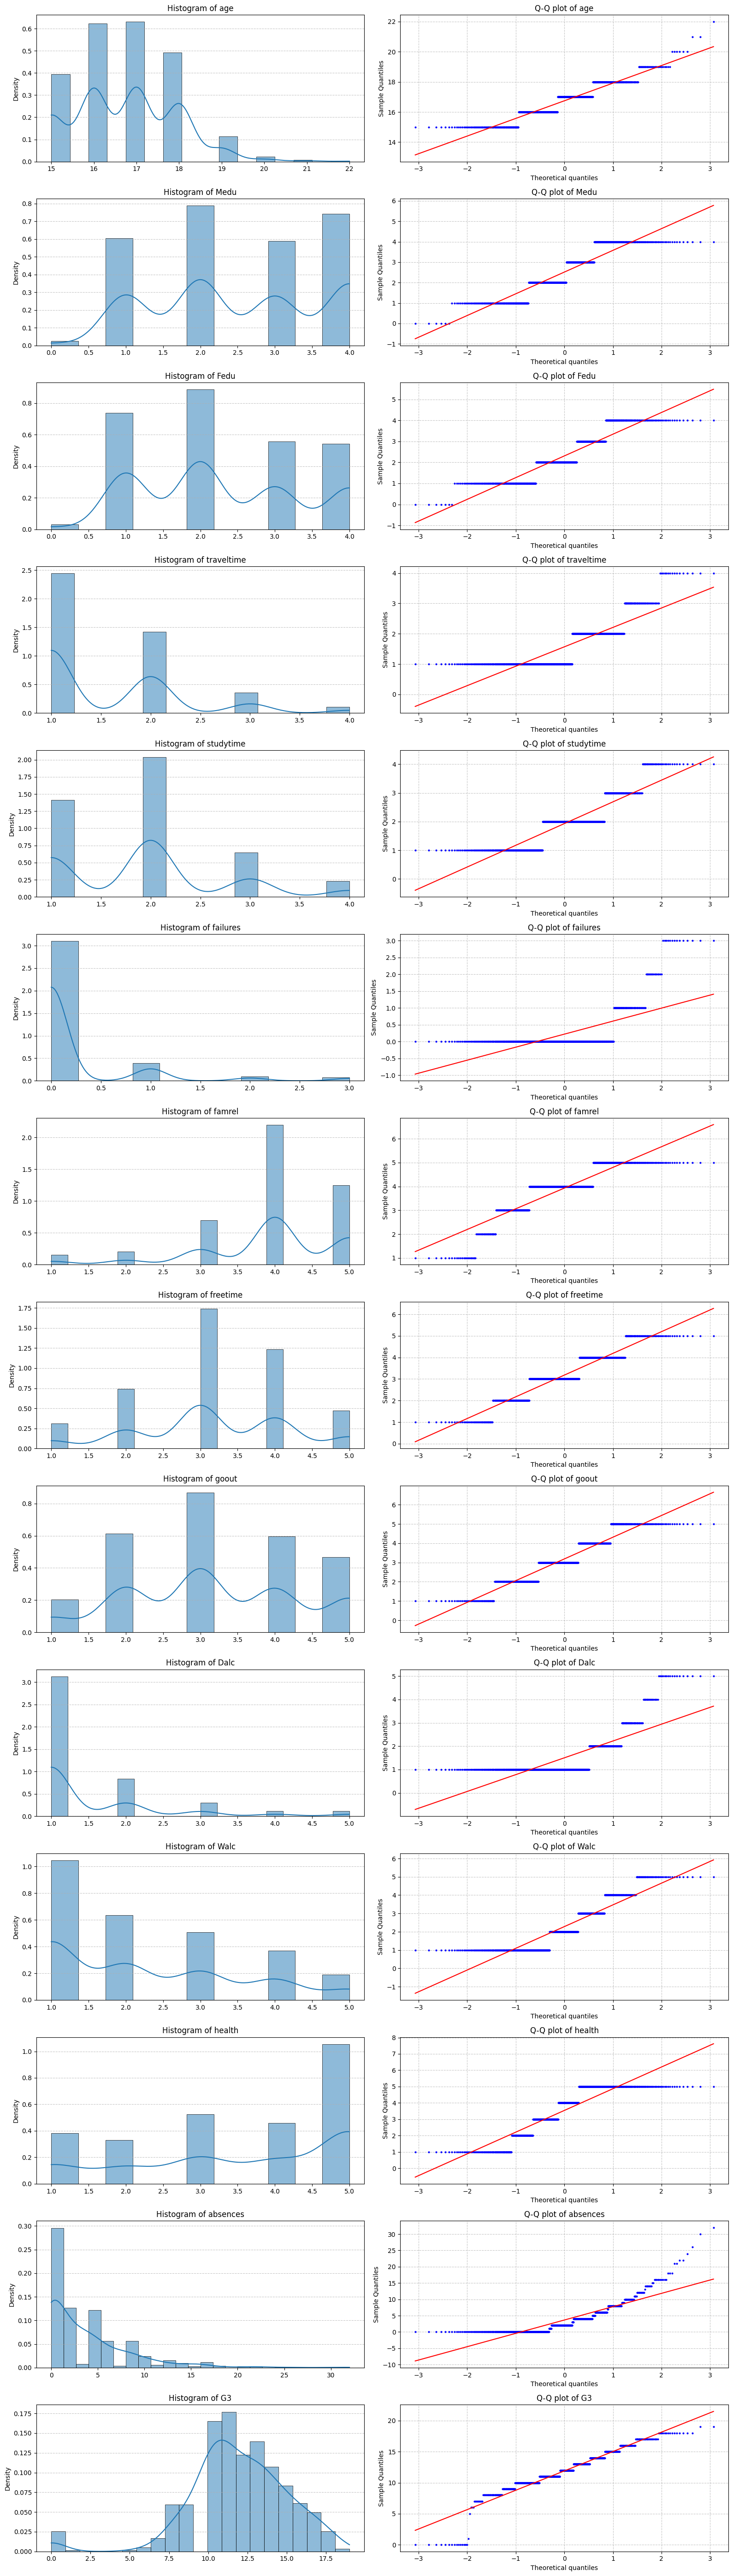

In [22]:
# create a figure and axes for sublpots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols * 4))

# plotting histograms and Q-Q plots for each numerical column
for i, col in enumerate(numerical_columns):
    # histogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], stat='density', linewidth=0.5)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].get_lines()[0].set_markersize(2.0) #adjust marker size for clarity
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].set_title(f'Q-Q plot of {col}')
    axes[i, 1].set_xlabel('Theoretical quantiles')
    axes[i, 1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

**Statistical Tests:** Use statistical methods such as the Shapiro-Wilk test or Kolmogorov-Smiirnov test. These tests ecaluate whether a sample of data comes from a normal distribution. If the p-value from these tests is greater than a chosen significance level (e.g., 0.05), it suggests that the data may follow a normal distribution

**Descriptive Statistics:** Calculate descriptive statistics such as mean, median, and standard deviation. For normally distributed data, the mean and median are typically close in value, and about 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

In [23]:
import scipy.stats as stats
from scipy.stats import shapiro, anderson, jarque_bera, normaltest, kstest
from statsmodels.stats.diagnostic import lilliefors

# function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')

    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shaprio-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shaprio-Wilk Test: {col} does not look normally distributed (reject H0)')

    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values={result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')
    
    # Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB Statistics={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')

    # D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f'D\'Agostino and Pearson\'s Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}')
    if p_agostino > 0.05:
        print(f'D\'Agostino and Pearson\'s Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'D\'Agostino and Pearson\'s Test: {col} does not look normally distributed (reject H0)')
    
    # Kolmogorov-Smirnov test
    ks_test, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS Statistics={ks_test:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    
    # Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')

    print('\n')
    
# perform normality tests on numerical columns
for col in numerical_columns:
    test_normality(df, col)

Column: age
Shapiro-Wilk Test: Statistics=0.916, p-value=0.000
Shaprio-Wilk Test: age does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=20.080
Anderson-Darling Test: Critical Values=[0.573 0.652 0.782 0.912 1.085]
Anderson-Darling Test: age does not look normally distributed (reject H0)
Jarque-Bera Test: JB Statistics=18.807, p-value=0.000
Jarque-Bera Test: age does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=17.922, p-value=0.000
D'Agostino and Pearson's Test: age does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS Statistics=1.000, p-value=0.000
Kolmogorov-Smirnov Test: age does not look normally distributed (reject H0)
Lilliefors Test: Statistics=0.175, p-value=0.001
Lilliefors Test: age does not look normally distributed (reject H0)


Column: Medu
Shapiro-Wilk Test: Statistics=0.870, p-value=0.000
Shaprio-Wilk Test: Medu does not look normally distributed (reject H0)
Anderson-Darling Test:

## Function to detect outliers using IQR method and return column-wise boolean indicators 

In [24]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns: # process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers_mask[col] = col_outliers_mask.any() # True if any outliers detected
    
    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outlier in outliers_iqr_mask.items():
    print(f'{col}: {is_outlier}')

Outliers detected using IQR method:
school: True
sex: True
age: True
address: True
famsize: True
Pstatus: True
Medu: False
Fedu: False
Mjob: True
Fjob: True
reason: True
guardian: True
traveltime: True
studytime: True
failures: True
schoolsup: True
famsup: True
paid: True
activities: True
nursery: True
higher: True
internet: True
romantic: True
famrel: True
freetime: True
goout: False
Dalc: True
Walc: False
health: False
absences: True
G3: True


## Function to find outliers using Z-score method and return column-wise boolean indicators

In [25]:
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns: # process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any() # True if any outliers detected
    
    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("Outliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f'{col}: {is_outlier}')

Outliers detected using Z-score method:
school: True
sex: True
age: True
address: True
famsize: True
Pstatus: True
Medu: False
Fedu: False
Mjob: True
Fjob: True
reason: True
guardian: True
traveltime: True
studytime: False
failures: True
schoolsup: True
famsup: True
paid: True
activities: True
nursery: True
higher: True
internet: True
romantic: True
famrel: True
freetime: False
goout: False
Dalc: True
Walc: False
health: False
absences: True
G3: True


## Function to remove outliers using IQR method 

In [26]:
'''
def remove_outliers_iqr(data):
    cleaned_data = data.copy()
    for col in data.columns:
        if col in numerical_columns: # process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    
    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)
'''

'\ndef remove_outliers_iqr(data):\n    cleaned_data = data.copy()\n    for col in data.columns:\n        if col in numerical_columns: # process only numerical columns\n            Q1 = data[col].quantile(0.25)\n            Q3 = data[col].quantile(0.75)\n            IQR = Q3 - Q1\n            lower_bound = Q1 - 1.5 * IQR\n            upper_bound = Q3 + 1.5 * IQR\n            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]\n    \n    return cleaned_data\n\ncleaned_data_iqr = remove_outliers_iqr(df)\nprint("DataFrame after removing outliers using IQR method:")\nprint(cleaned_data_iqr)\n'

## Function to remove outliers using Z-score method

In [27]:
'''
def remove_outliers_zscore(data, threshold=3):
    cleaned_data = data.copy()
    for col in data.columns:
        if col in numerical_columns: # process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            cleaned_data = cleaned_data[z_scores <= threshold]
    
    return cleaned_data

cleaned_data_zscore = remove_outliers_zscore(df)
print("DataFrame after removing outliers using Z-score method:")
print(cleaned_data_zscore)
'''

'\ndef remove_outliers_zscore(data, threshold=3):\n    cleaned_data = data.copy()\n    for col in data.columns:\n        if col in numerical_columns: # process only numerical columns\n            mean = np.mean(data[col])\n            std_dev = np.std(data[col])\n            z_scores = np.abs((data[col] - mean) / std_dev)\n            cleaned_data = cleaned_data[z_scores <= threshold]\n    \n    return cleaned_data\n\ncleaned_data_zscore = remove_outliers_zscore(df)\nprint("DataFrame after removing outliers using Z-score method:")\nprint(cleaned_data_zscore)\n'

# Exploratory Data Analysis

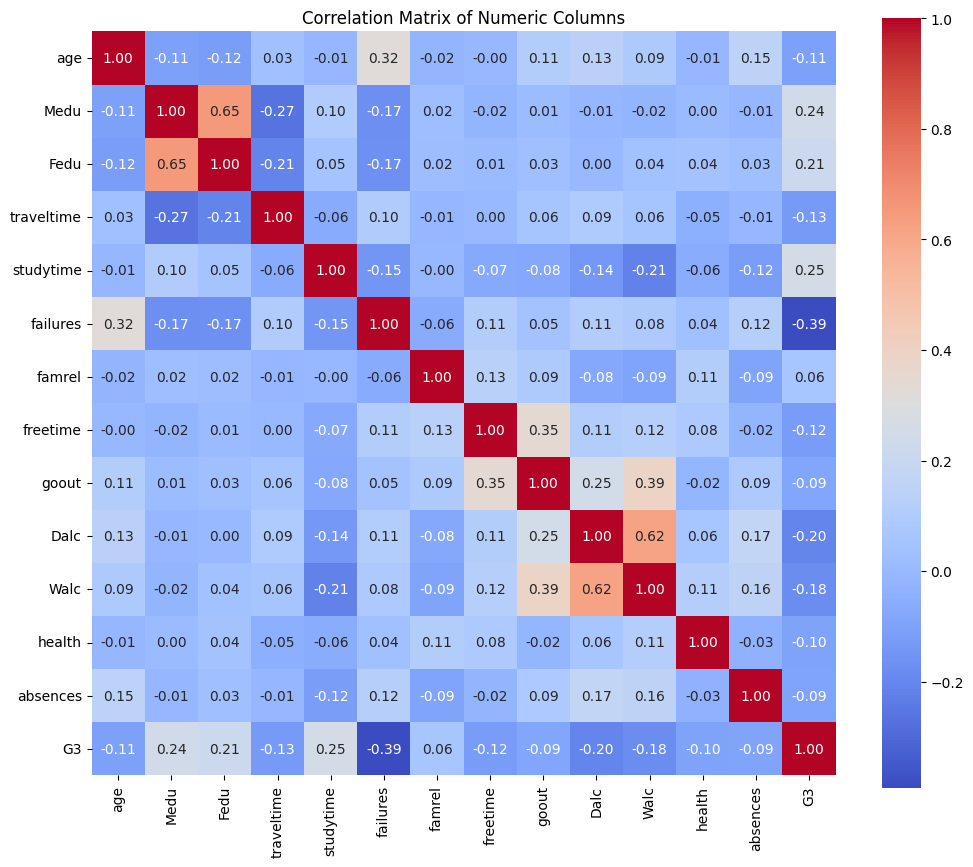

In [28]:
numeric_data = df[numerical_columns]

# compute pariwise correlation of numeric columns
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [29]:
# create new column 'GPA' based on 'G3' column
df['GPA'] = df['G3'] / 5 # since G3 ranges from 0 to 20, we divide by 5 to get GPA on a scale of 0 to 4

# create new column 'pass/fail' based on G3 condition
df['pass/fail'] = df['G3'].apply(lambda x: 'Pass' if x >= 12 else 'Fail')

In [30]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,KEC,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4,1,1,3,4,11,2.2,Fail
1,KEC,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3,1,1,3,2,11,2.2,Fail
2,KEC,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2,2,3,3,6,12,2.4,Pass
3,KEC,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3.0,2.0,2,1,1,5,0,14,2.8,Pass
4,KEC,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4.0,3.0,2,1,2,5,0,13,2.6,Pass


In [31]:
df['pass/fail'].value_counts()

pass/fail
Pass    348
Fail    301
Name: count, dtype: int64

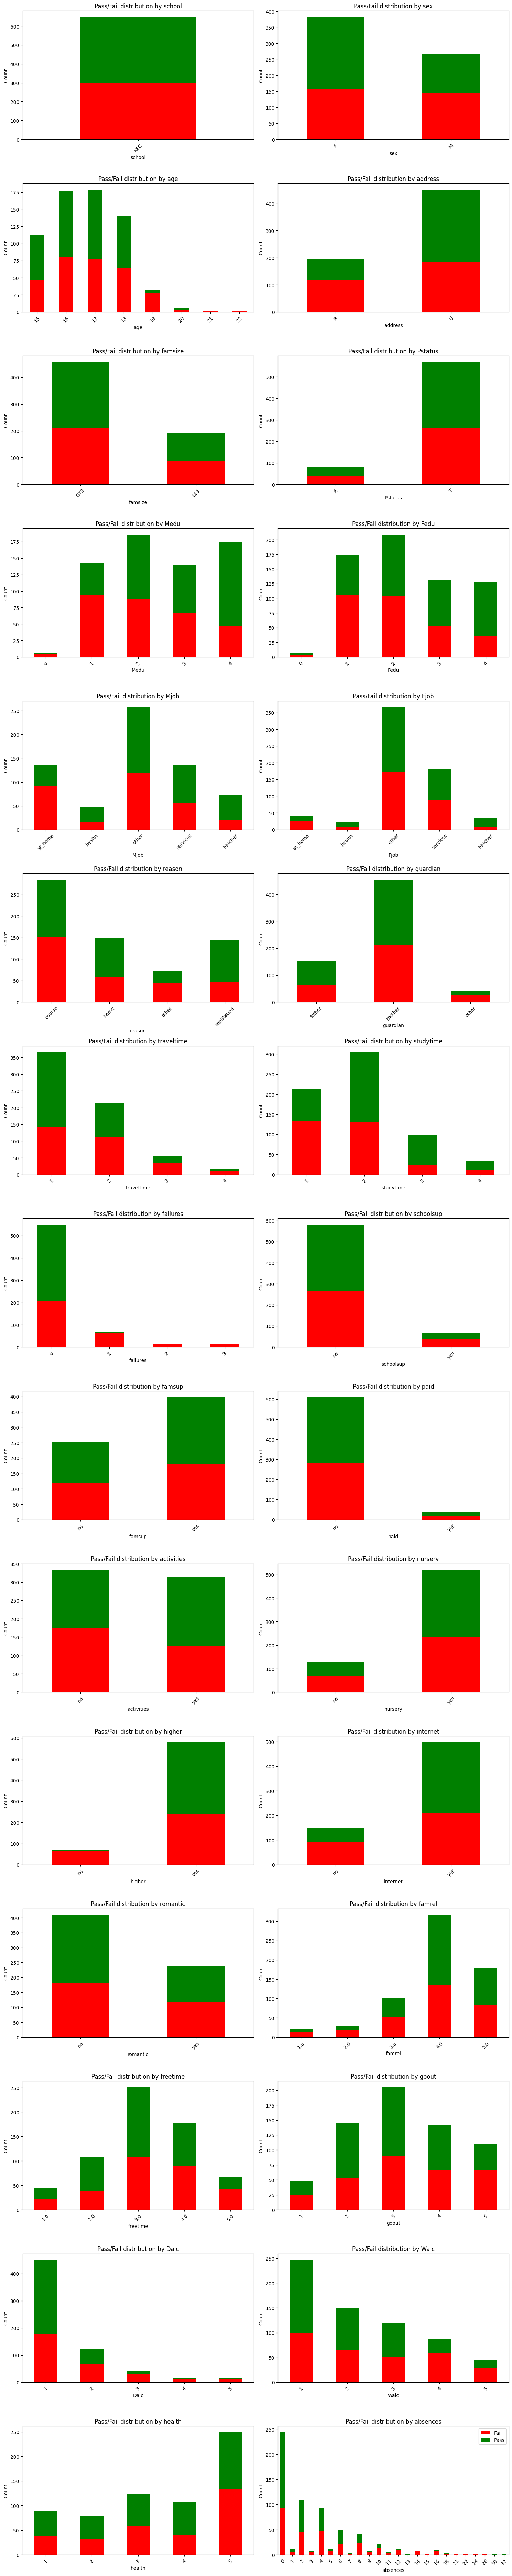

In [32]:
# Assuming df, pass/fail column, and GPA column are already defined as per the previous code discussions

# Exclude columns that are not required for the plotting
columns_to_plot = [col for col in df.columns if col not in ['G3', 'pass/fail', 'GPA']]

# calculate the number of rows and columns for subplots grid
num_cols = 2 # number of columns in the subplot layout
num_rows = (len(columns_to_plot) + 1) // num_cols # calculate number of rows needed

# Adjust figure size based on the number of subplots
fig_width = 15
fig_height = num_rows * 5 # adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

# iterate through each column to plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i+1)
    pass_fail_cross = pd.crosstab(df[col], columns=df['pass/fail'])
    pass_fail_cross.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca(), legend=None)
    plt.title(f'Pass/Fail distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout(pad=2.0) # adjust spacing between subplots

# adjust layout and display the plot
plt.tight_layout()
plt.legend(['Fail', 'Pass'], loc='upper right')
plt.show()

In [33]:
# iterate through each column
for col in df.columns:
    # get unique values in the column
    unique_values = df[col].unique()

    # print the column name and its unique values
    print(f"Unique values in {col} column:")
    print(unique_values)
    print('\n')

Unique values in school column:
['KEC']


Unique values in sex column:
['F' 'M']


Unique values in age column:
[18 17 15 16 19 22 20 21]


Unique values in address column:
['U' 'R']


Unique values in famsize column:
['GT3' 'LE3']


Unique values in Pstatus column:
['A' 'T']


Unique values in Medu column:
[4 1 3 2 0]


Unique values in Fedu column:
[4 1 2 3 0]


Unique values in Mjob column:
['at_home' 'health' 'other' 'services' 'teacher']


Unique values in Fjob column:
['teacher' 'other' 'services' 'health' 'at_home']


Unique values in reason column:
['course' 'other' 'home' 'reputation']


Unique values in guardian column:
['mother' 'father' 'other']


Unique values in traveltime column:
[2 1 3 4]


Unique values in studytime column:
[2 3 1 4]


Unique values in failures column:
[0 3 1 2]


Unique values in schoolsup column:
['yes' 'no']


Unique values in famsup column:
['no' 'yes']


Unique values in paid column:
['no' 'yes']


Unique values in activities column:
['no' 'yes']


In [34]:
df.to_csv('Data_sets/filtered_data.csv', index=False)

# Loading and Working with the Filtered Datasets and Analyzing the Data

In [35]:
data = pd.read_csv('Data_sets/filtered_data.csv')

In [36]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA,pass/fail
0,KEC,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4,1,1,3,4,11,2.2,Fail
1,KEC,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3,1,1,3,2,11,2.2,Fail
2,KEC,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2,2,3,3,6,12,2.4,Pass
3,KEC,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3.0,2.0,2,1,1,5,0,14,2.8,Pass
4,KEC,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4.0,3.0,2,1,2,5,0,13,2.6,Pass


In [37]:
data = data.drop('school', axis=1)

# data.drop(columns=['school'], axis=1, inplace=True)

In [38]:
data.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G3', 'GPA', 'pass/fail'],
      dtype='object')

In [39]:
numerical_cols = data.select_dtypes(exclude=['category', 'object']).columns
categorical_cols = data.select_dtypes(include=['category', 'object']).columns

In [40]:
numerical_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'GPA'],
      dtype='object')

In [41]:
categorical_cols

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'pass/fail'],
      dtype='object')

In [42]:
# drop numerical columns from data
data_categorical = data.drop(columns=numerical_cols)

# perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data_categorical,
                              columns=['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [43]:
encoded_data.head()

,pass/fail,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,Fail,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,Fail,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,Pass,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False
3,Pass,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True
4,Pass,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False


In [44]:
'''
from sklearn.preprocessing import OneHotEncoder

# drop numerical columns from data
data_categorical = data.drop(columns=numerical_cols)

# initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
columns=['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# fit and transform the categorical columns
encoded_data = encoder.fit_transform(data_categorical[columns])
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\n\n# drop numerical columns from data\ndata_categorical = data.drop(columns=numerical_cols)\n\n# initialize the OneHotEncoder\nencoder = OneHotEncoder(sparse=False, drop='first')\ncolumns=['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']\n\n# fit and transform the categorical columns\nencoded_data = encoder.fit_transform(data_categorical[columns])\n"

## Pipelining

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# assuming encoded_data is already created from one-hot encoding
# numerical_cols should be defined earlier as numerical columns from the dataset

# pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# transform numerical columns
numerical_data = numerical_pipeline.fit_transform(data[numerical_cols])

# convert transformed numerical data to DataFrame
numeric_data_df = pd.DataFrame(numerical_data, columns=numerical_cols)

# combine numerical and encoded categorical data
final_data = pd.concat([encoded_data, numeric_data_df], axis=1)

# now final data contains all the processed data ready for modeling

In [46]:
final_data.head(30)

,pass/fail,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,GPA
0,Fail,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-0.280658,-0.280658
1,Fail,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.280658,-0.280658
2,Pass,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.029116,0.029116
3,Pass,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.648663,0.648663
4,Pass,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,0.338889,0.338889
5,Pass,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,True,False,-0.611422,1.310216,0.630866,-0.760032,0.083653,-0.374305,1.119748,0.780478,-1.008546,-0.543555,-0.218508,1.012903,0.504730,0.338889,0.338889
6,Pass,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,True,False,-0.611422,-0.453954,-0.278983,-0.760032,0.083653,-0.374305,0.072606,0.780478,0.693785,-0.543555,-0.997695,-0.371042,-0.789159,0.338889,0.338889
7,Pass,True,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,True,False,True,True,False,True,False,0.210137,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-2.075896,0.693785,-0.543555,-0.997695,-1.754987,-0.357863,0.338889,0.338889
8,Pass,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,True,False,-1.432980,0.428131,-0.278983,-0.760032,0.083653,-0.374305,0.072606,-1.123771,-1.008546,-0.543555,-0.997695,-1.754987,

In [47]:
final_data.columns

Index(['pass/fail', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G3', 'GPA'],
      dtype='object')

# Machine Learning

## Decision Tree

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # for saving the model

In [63]:
# extract features(X) and target variable(y)
X = final_data.drop('pass/fail', axis=1)
y = final_data['pass/fail']

# convert target variable to binary (0 and 1)
y = y.map({'Fail': 0, 'Pass': 1})

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [64]:
# initialize decicion tree classifier
model = DecisionTreeClassifier(random_state=42)

# fit tne model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Training Accuracy: 1.00
Test Accuracy: 1.00
Confusion Matrix:
[[57  0]
 [ 0 73]]


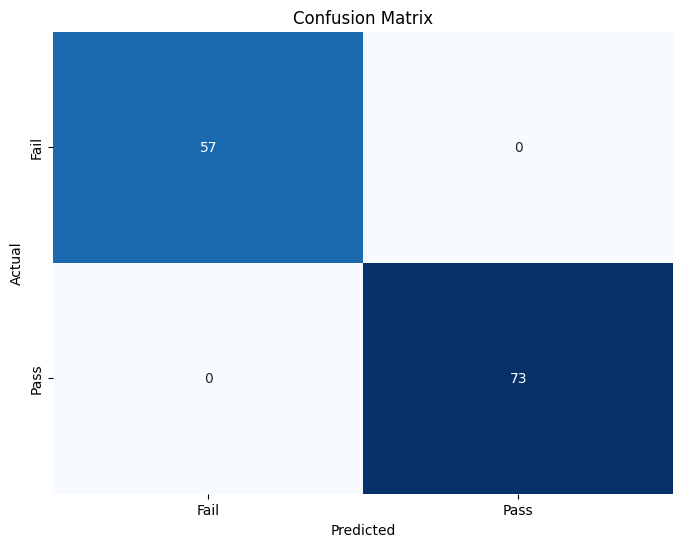

In [65]:
# predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

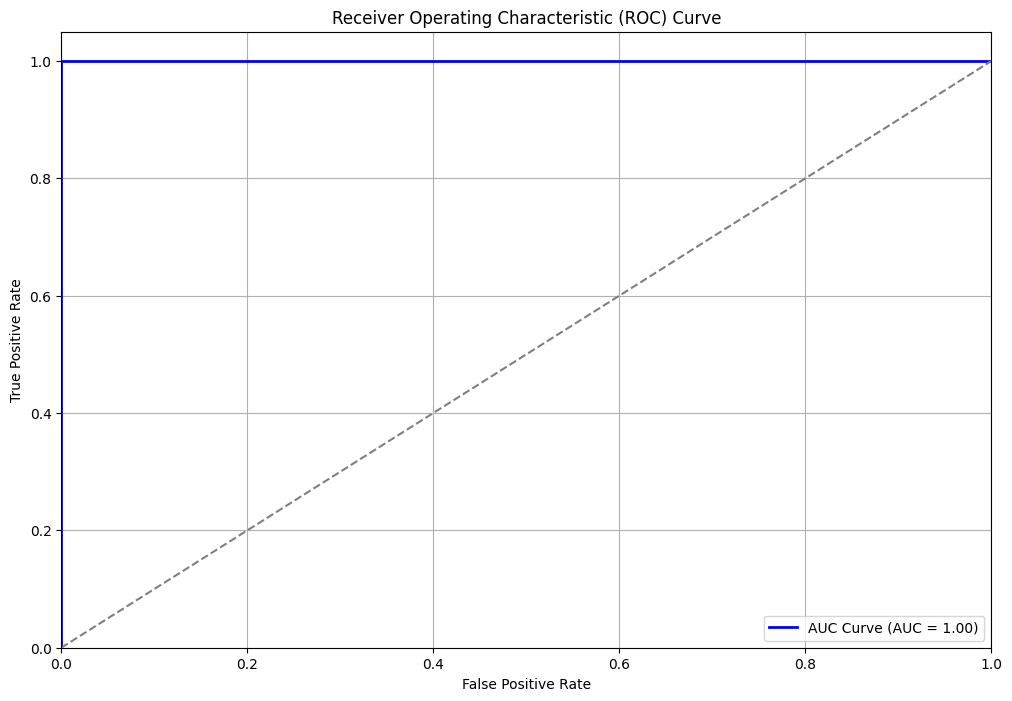

In [67]:
# calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1] # probability of Positive class
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# plot ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

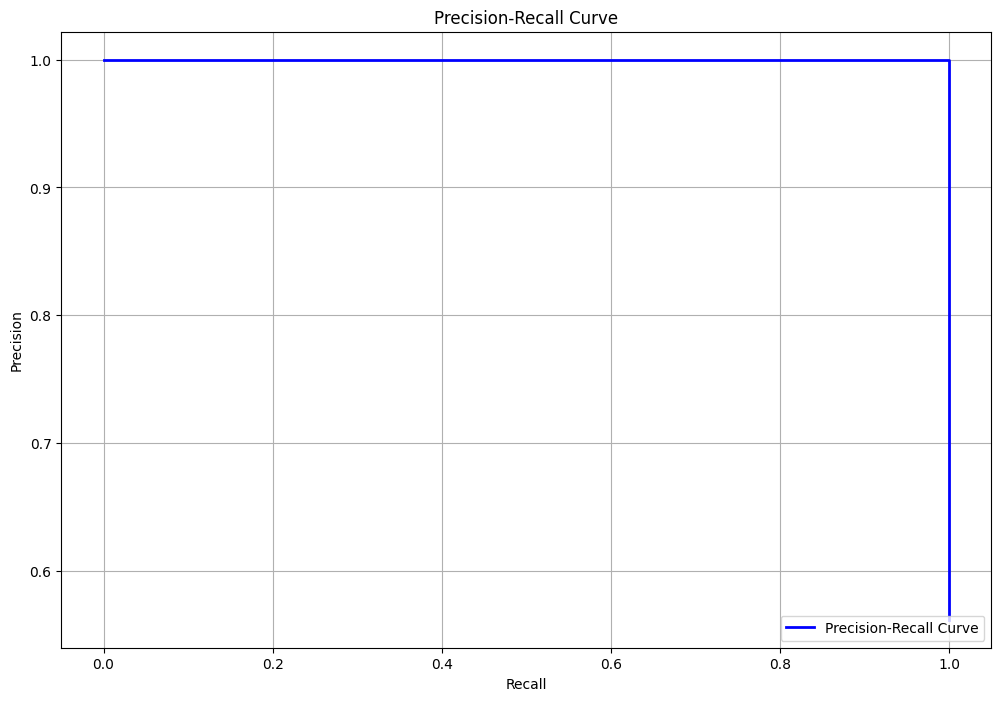

In [71]:
# calculate Precision-Recall curve and F1 score for test set
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall)

# plot Precision-Recall curve
plt.figure(figsize=(12, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

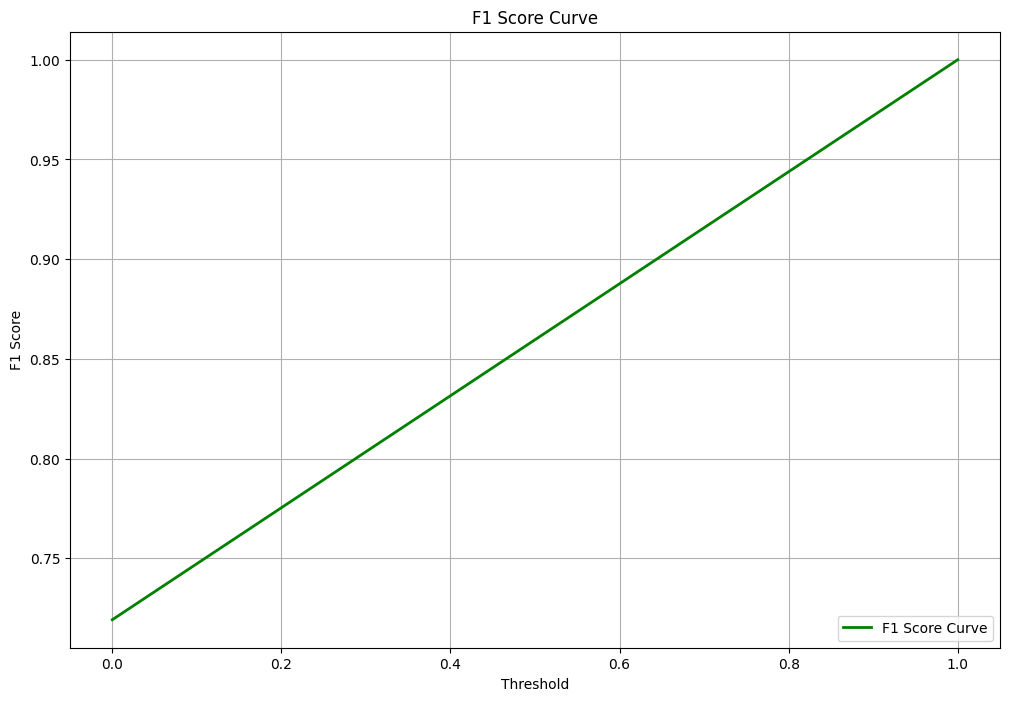

In [72]:
# plot F1 Score curve
plt.figure(figsize=(12, 8))
plt.plot(pr_thresholds, f1_scores[:-1], color='g', lw=2, label='F1 Score Curve')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [74]:
# save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.mkdir('ML_MODEL')

model_path = os.path.join('ML_MODEL', 'decision_tree_model.pkl')
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/decision_tree_model.pkl


## K-NN Algorithm

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
# initialize K-Nearest Neighbors classifier
model_knn = KNeighborsClassifier()

# fit the model_knn
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Training Accuracy: 0.90
Test Accuracy: 0.78
Confusion Matrix:
[[36 21]
 [ 7 66]]


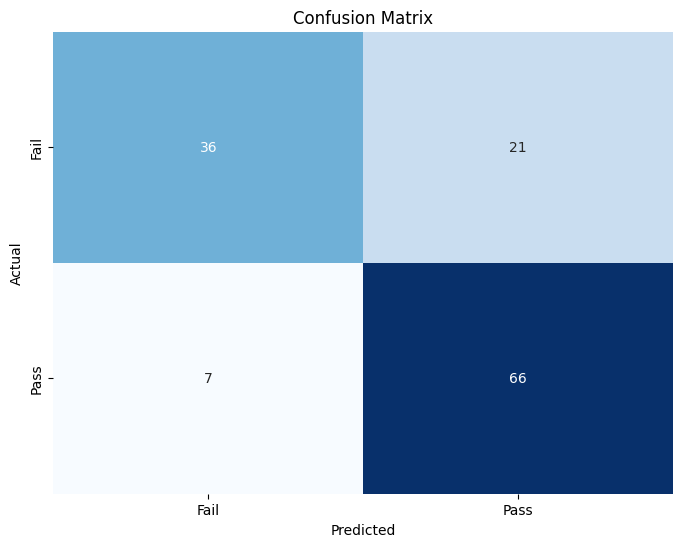

In [78]:
# predict on training and test sets
y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

# calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [79]:
# save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.mkdir('ML_MODEL')

model_path = os.path.join('ML_MODEL', 'knn_model.pkl')
joblib.dump(model_knn, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/knn_model.pkl
